In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
import numpy as np
from pylab import *


In [2]:
cd DDBin

/home/shane/lofasmfiles/DDBin


In [3]:
dd15 = np.load('20190615outputbinDD.npy')
dd16 = np.load('20190616outputbinDD.npy')
dd17 = np.load('20190617outputbinDD.npy')

dd24 = np.load('20190624outputbinDD.npy')
dd28 = np.load('20190628outputbinDD.npy')
dd29 = np.load('20190629outputbinDD.npy')
dd30 = np.load('20190630outputbinDD.npy')
dd01 = np.load('20190701outputbinDD.npy')

dd15 = dd15.T
dd16 = dd16.T
dd17 = dd17.T
dd24 = dd24.T
dd28 = dd28.T
dd29 = dd29.T
dd30 = dd30.T
dd01 = dd01.T

In [6]:
def spectdayplt(ifile,date):
    fig, ax = plt.subplots()

    plt.setp(ax, xticks=[0,11.79,23.58,35.37,47.16,58.95,70.74,82.53,94.32,106.11,117.9,129.69,141.48,153.27,165.06,176.85,188.64,200.43,212.22,224.01,235.8,247.59,259.38,271.17,282.96,294.75],
             xticklabels=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'],
             yticks=[184,225,266,307,348,389,430,471,512,552,593,634,675,716,757],
             yticklabels=['18','22','26','30','34','38','42','46','50','54','58','62','66','70','74'])

    plt.xlabel('Time \n(hours after 00:00)')
    plt.ylabel('Frequency (MHz)')
    plt.title(str(date)+' DD')
    ylim(150,750)


    ax.yaxis.label.set_size(12)
    ax.xaxis.label.set_size(12)
    ax.title.set_size(15)

    fig.set_size_inches(15,10)

 


 

    plt.imshow((ifile), aspect='auto', origin='lower', vmax=2e4)

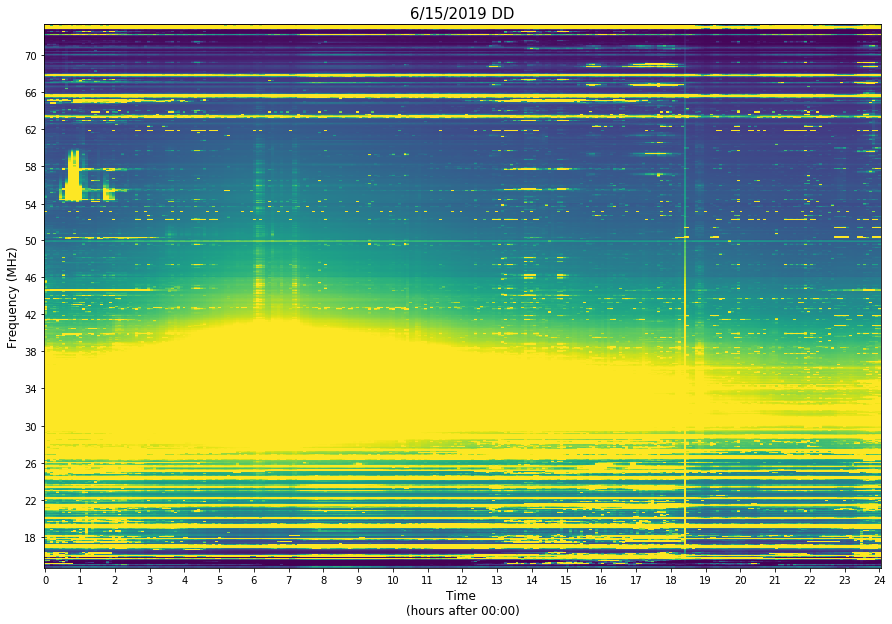

In [12]:
spectdayplt(dd15,'6/15/2019')

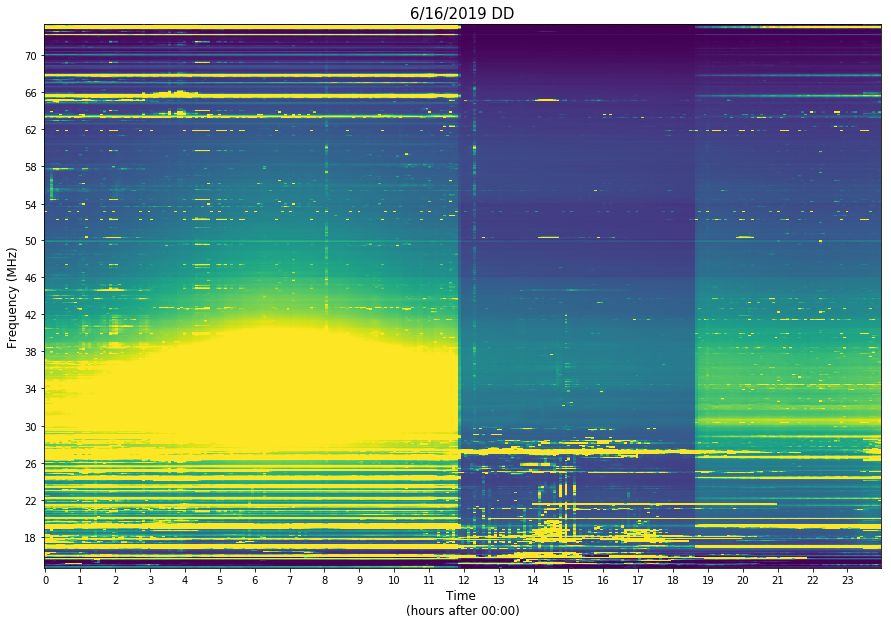

In [16]:
spectdayplt(dd16,'6/16/2019')

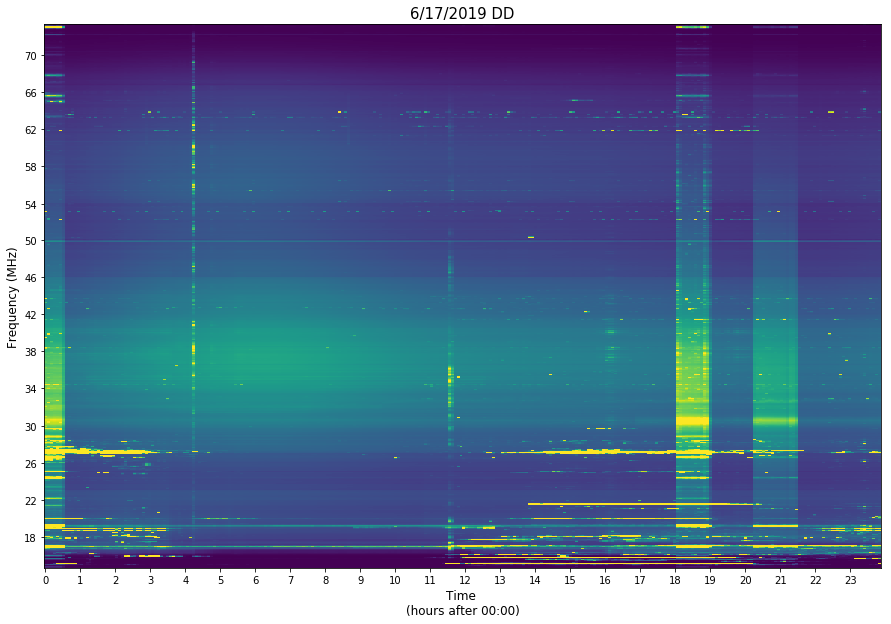

In [15]:
spectdayplt(dd17,'6/17/2019')

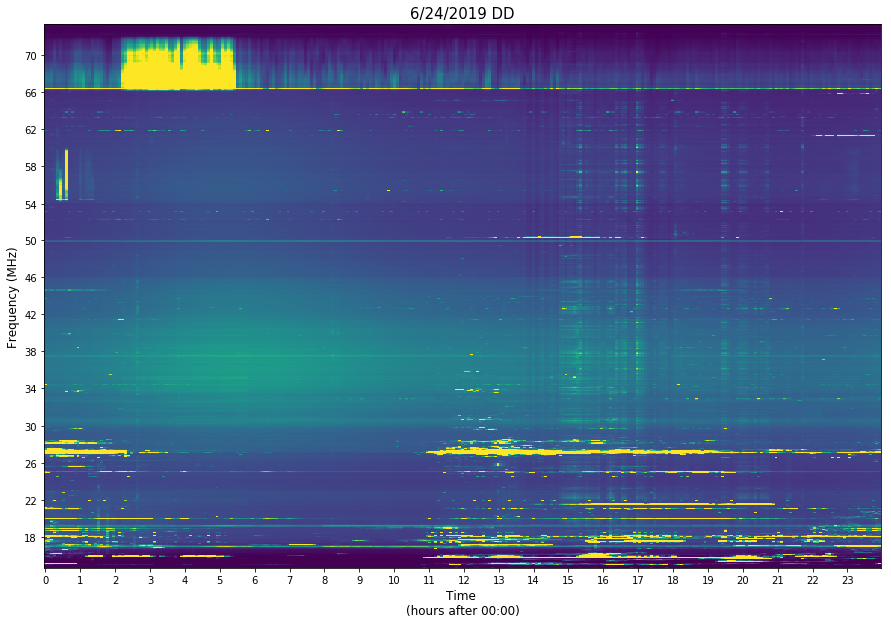

In [17]:
spectdayplt(dd24,'6/24/2019')

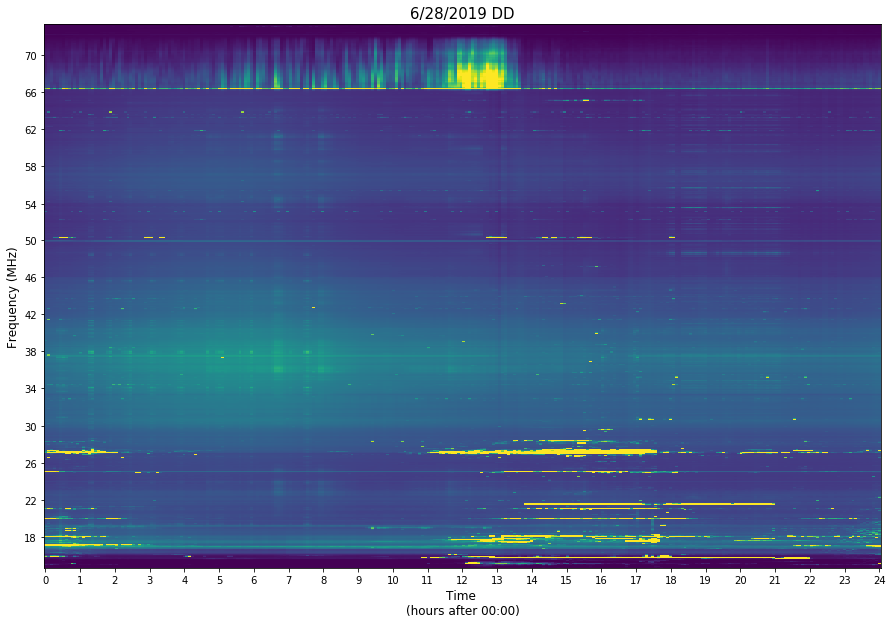

In [18]:
spectdayplt(dd28,'6/28/2019')

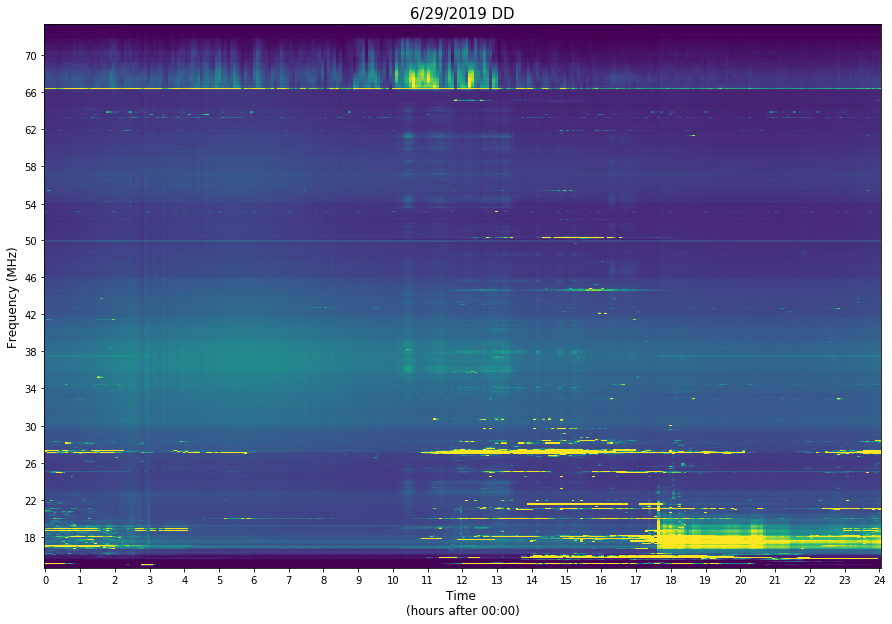

In [19]:
spectdayplt(dd29,'6/29/2019')

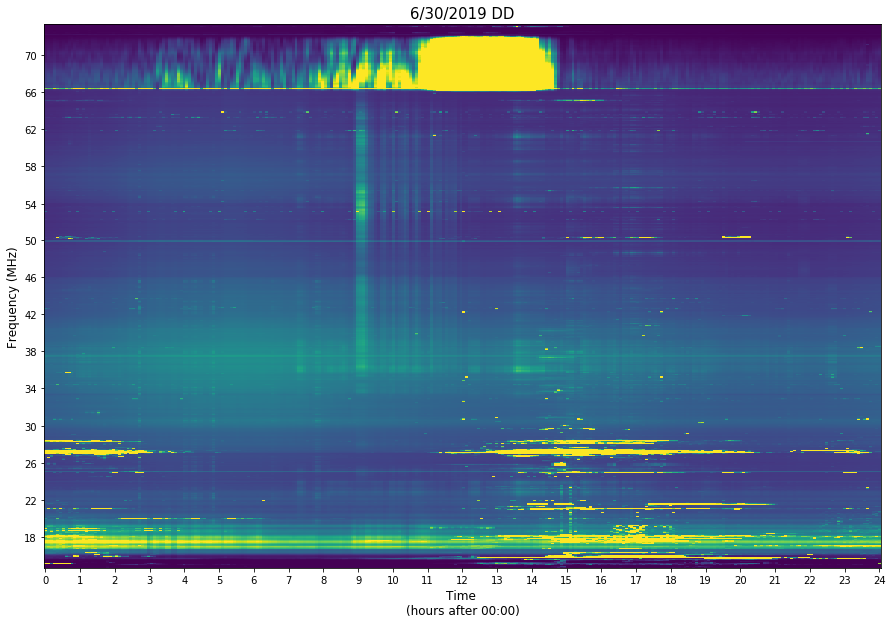

In [20]:
spectdayplt(dd30,'6/30/2019')

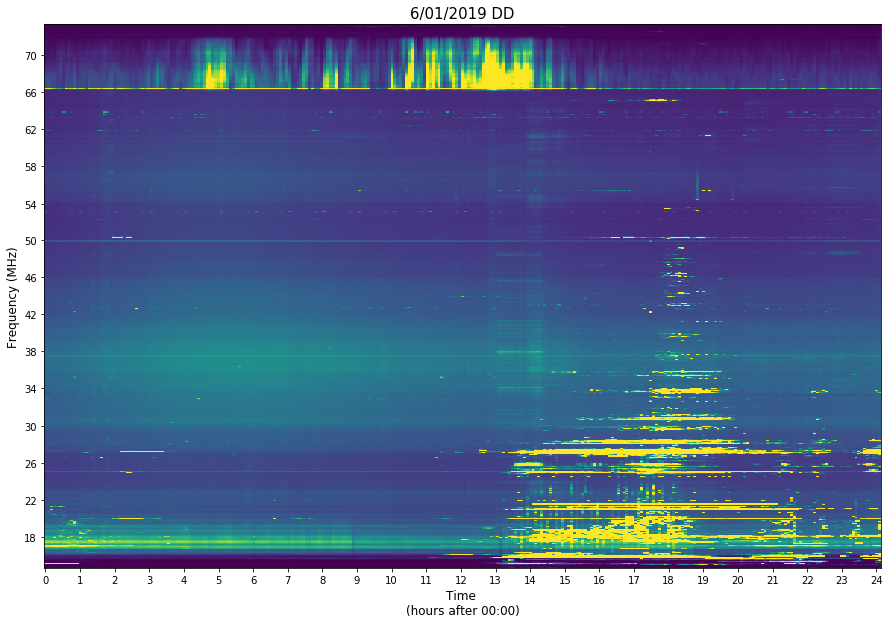

In [21]:
spectdayplt(dd01,'6/01/2019')

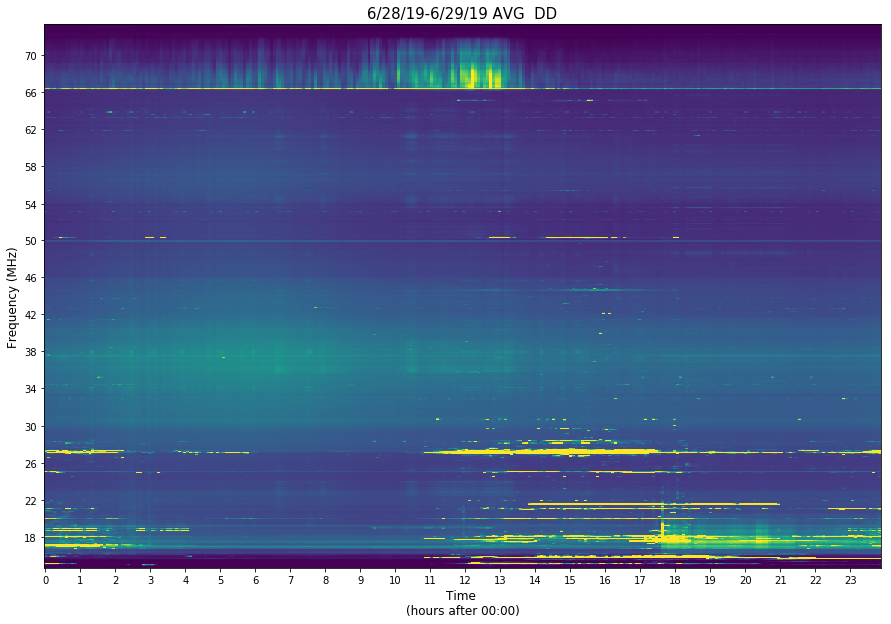

In [7]:
ddav = (dd28[0:1024,:282]+dd29[0:1024,:282])/2
spectdayplt(ddav,'6/28/19-6/29/19 AVG ')

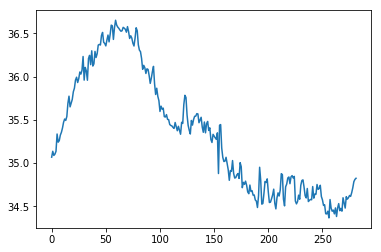

In [8]:
ddavup1 = np.average(10*np.log10(ddav[522:573]), axis=0)
plt.plot(ddavup1)

In [14]:
t30, i30=fgetcols('lofasm5_30.0MHz_0.0deg_outer.dat',1,2)
i230 = np.roll(i30,150)
#t30i, i30i=fgetcols('lofasm5_30.0MHz_0.0deg_inner.dat',1,2)
#i230i = np.roll(i30i,150)

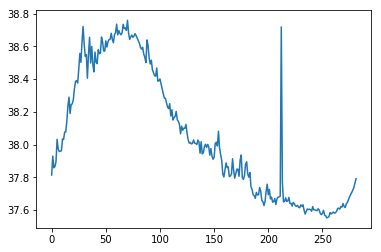

In [16]:
ddavlo1 = np.average(10*np.log10(ddav[306:311]), axis=0)
plt.plot(ddavlo1)

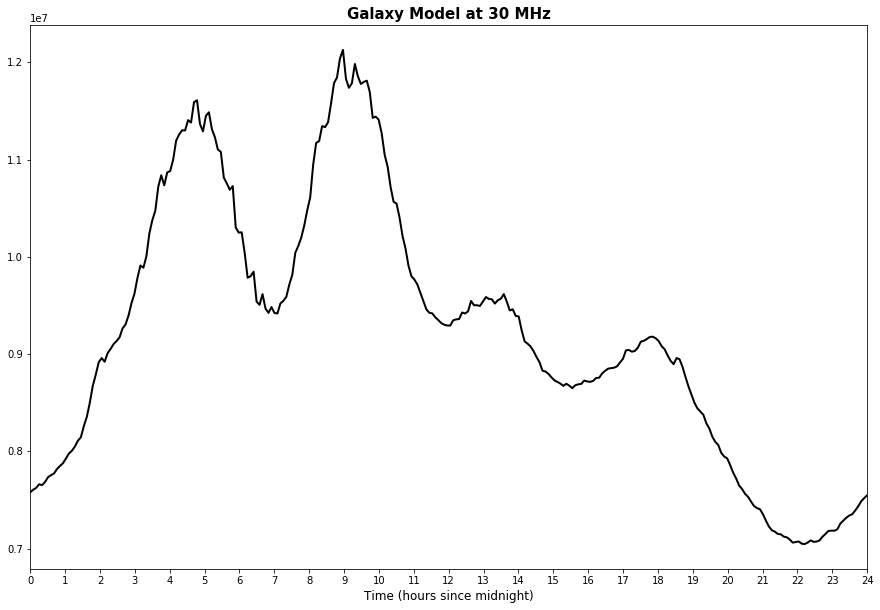

In [30]:
fig, ax = plt.subplots()
#ccavg30MHz = np.load('ccavg30MHz.npy')

plt.setp(ax, xticks=[0,11.75,23.5,35.25,47,58.75,70.5,82.25,94,105.75,117.5,129.25,141,152.75,164.5,176.25,188,199.75,211.5,223.25,235,246.75,258.5,270.25,282],
         xticklabels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])

plt.xlabel('Time (hours since midnight)')
#plt.ylabel('Power Spectrum (arbitrary)')
#plt.title('LoFASM V Data and Galaxy Model at 30 MHz\n6/15/2019 - 6/17/2019', fontweight='bold')
plt.title('Galaxy Model at 30 MHz', fontweight='bold')
plt.xlim(0,282)

ax.yaxis.label.set_size(12)
ax.xaxis.label.set_size(12)
ax.title.set_size(15)
params = {'legend.fontsize':13,
         'legend.handlelength': 1}
rcParams.update(params)
fig.set_size_inches(15,10)


pltmodel, = plt.plot(t30*11.75,i230, label='Galaxy Model Outer', color='black', linewidth=2)
#pltmodeli, = plt.plot(t30i*11.75,i230i, label='Galaxy Model Inner', linewidth=2)
#pltdata, = plt.plot(ddavlo1, label='LoFASM V DD (outer ring?)', linewidth=2)
#plt.legend(handles=[pltdata])

#plt.axvline(x=9.4, color='green')
#plt.axvline(x=36, color='red')
#plt.axvline(x=75.8, color='yellow')

plt.savefig('DDmodel.png', dpi=600)
plt.show()